# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


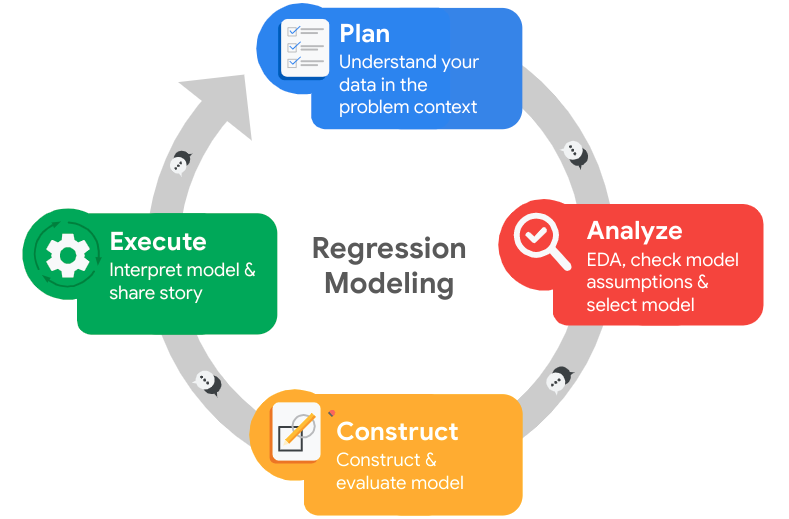

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? Salifort's stakeholders.
- What are you trying to solve or accomplish? I will build a regression model and a machine learning model to predict whether an employee will churn the company. If I can convey to the company's stakeholders under what parameters the model was able to predict employees' churn, they will be able to improve their environment, increase employees' satisfaction, and reduce the company's turnover. 
- What are your initial observations when you explore the data? It seems good; although there is not a specific column about their job title, stakeholders mentioned they want to know if that is related too.
- What resources do you find yourself using as you complete this stage? Python, Google Documents, Whiteboard, Jupyter Notebook... The data collected by human resources, basic hardware and software (computers, Python and its tools, visualization software, etc.), stakeholders’ feedback and availability...
- Do you have any ethical considerations in this stage? The prediction of this doesn't have to consider stuff like race, gender, sexual orientation, or any other aspect not related to their professional life. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [25]:
# Import packages
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,  PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# This function displays the splits of the tree
from sklearn.tree import plot_tree

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

# package to save and load models
import pickle as pkl

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
print(df0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
pd.set_option('display.float_format', '{:.2f}'.format)
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
for column in df0.columns:
    print(f'\n{column}')


satisfaction_level

last_evaluation

number_project

average_montly_hours

time_spend_company

Work_accident

left

promotion_last_5years

Department

salary


In [6]:
# Rename columns as needed
df0.rename(columns={'Department':'department'}, inplace=True)

# Display all column names after the update
for column in df0.columns:
    print(f'\n{column}')


satisfaction_level

last_evaluation

number_project

average_montly_hours

time_spend_company

Work_accident

left

promotion_last_5years

department

salary


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()==True]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0 = df0.drop_duplicates()

# Double-check that there are no duplicates
df0.duplicated().sum()

0

In [11]:
# Display first few rows of new dataframe as needed
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

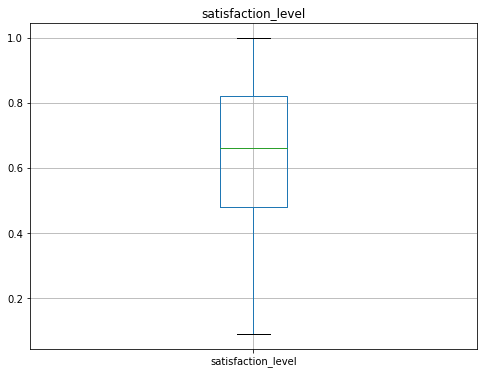

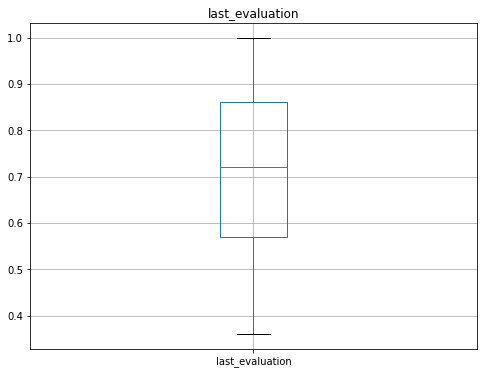

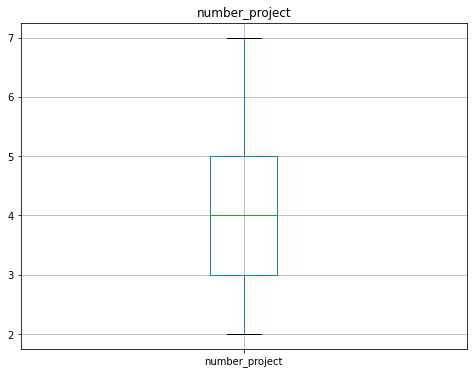

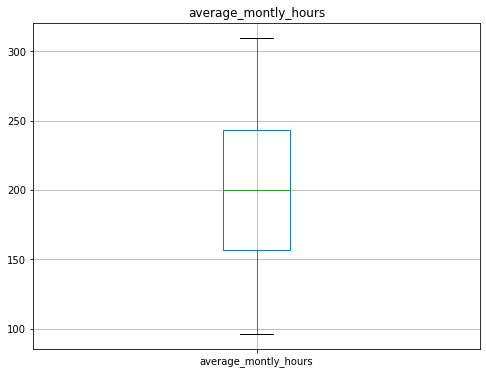

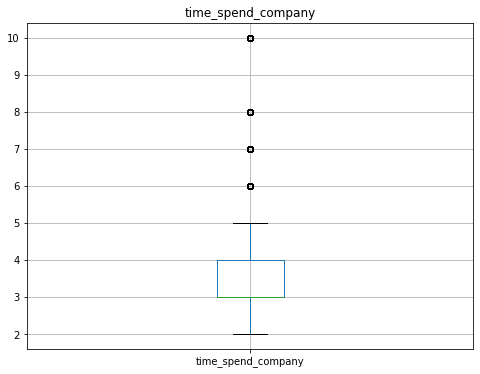

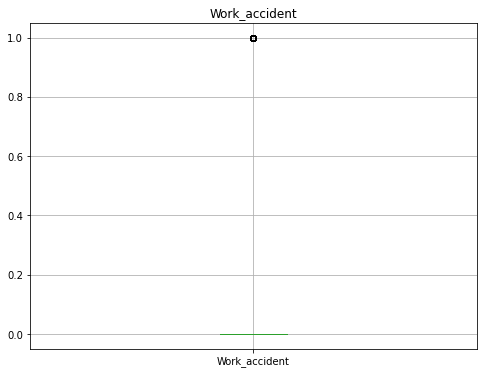

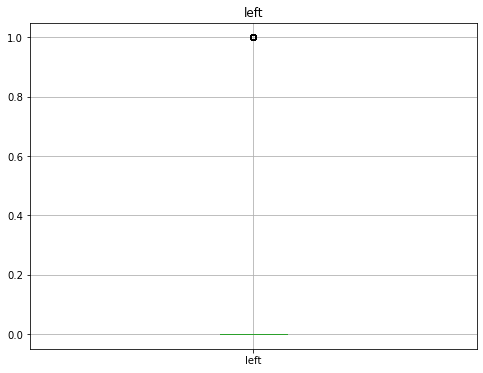

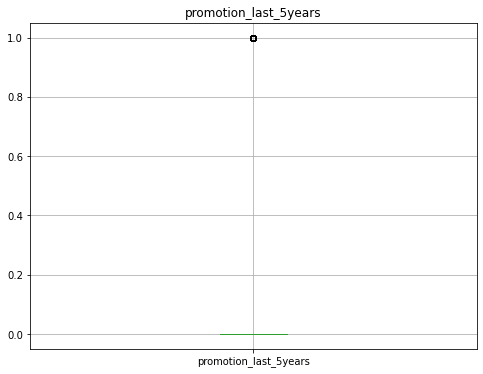

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
def boxplot(df):
    numerical_columns = df.select_dtypes(include='number').columns
    
    for column in numerical_columns:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=column)
        plt.title(column)
        plt.show()

boxplot(df0)

In [13]:
# Determine the number of rows containing outliers
outliers = {}
numerical_columns = df0[['satisfaction_level', 'last_evaluation', 'number_project', 
                         'average_montly_hours', 'time_spend_company']]
for column in numerical_columns:
    Q1 = df0[column].quantile(0.25)
    Q3 = df0[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers[column] = df0[(df0[column] < lower_bound) | (df0[column] > upper_bound)][column]

for column in outliers:
    if len(outliers[column]) > 0:
        print(len(outliers[column]))
        print(column)
        print('---------------')
    else:
        pass

824
time_spend_company
---------------


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables? Left (the target variable) probably have some correlation with some variables, such as satisfaction level, monthly hours, and time spent at the company. 
- What do you observe about the distributions in the data? There are more samples of people who stayed than people who left. Specifically, just 16.60% of the samples are from people who left the company.
- What transformations did you make with your data? Why did you chose to make those decisions? It wasn't necessary to make any transformations in the data.
- What are some purposes of EDA before constructing a predictive model? Clean the data, prepare it for use, and fix possible problems that can affect the model. 
- What resources do you find yourself using as you complete this stage? Seaborn documentation: https://seaborn.pydata.org/, pandas documentation: https://pandas.pydata.org/docs/, and some forums like: https://stackoverflow.com/
- Do you have any ethical considerations in this stage? For this stage, I used the same ethical considerations as in the past stages. 

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print('Number of people who left vs stayed:')
print(df0['left'].value_counts())

# Get percentages of people who left vs. stayed
print('\npercentages of people who left vs. stayed')
print(df0['left'].value_counts(normalize=True)*100)

Number of people who left vs stayed:
0    10000
1     1991
Name: left, dtype: int64

percentages of people who left vs. stayed
0   83.40
1   16.60
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Leavings per satisfaction level')

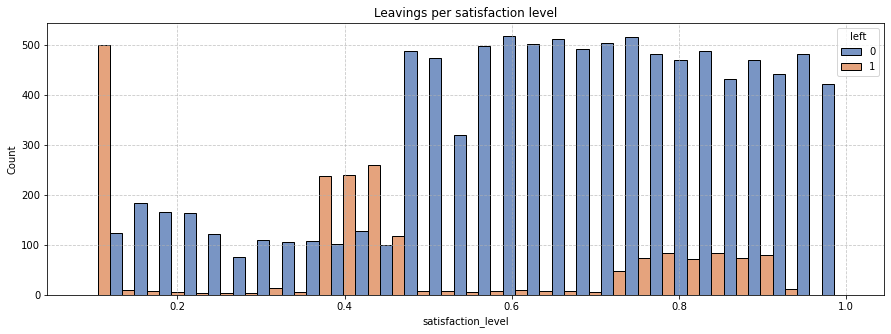

In [15]:
# visualization about: correlation between satisfaction level and leavings
plt.figure(figsize=(15, 5))
sns.histplot(
    data=df0,
    multiple='dodge',
    hue='left',
    x='satisfaction_level',
    kde=False,
    element='bars',
    palette='deep'
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Leavings per satisfaction level')

Text(0.5, 1.0, 'Leavings per salary level')

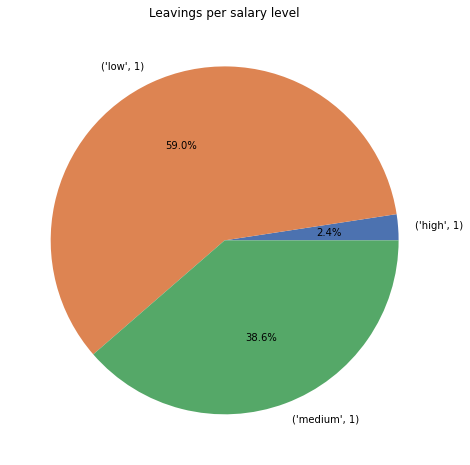

In [17]:
# # visualization about: correlation between salary level and leavings
salary_left_count = df0[df0['left']==1].groupby('salary')['left'].value_counts()
plt.figure(figsize=(15, 8))
plt.pie(
    salary_left_count,
    labels=salary_left_count.index, 
    autopct='%1.1f%%',
    colors=sns.color_palette('deep')
)
plt.title('Leavings per salary level')

In [16]:
# salaries balance in the company
df0['salary'].value_counts(normalize=True)*100

low      47.87
medium   43.87
high      8.26
Name: salary, dtype: float64

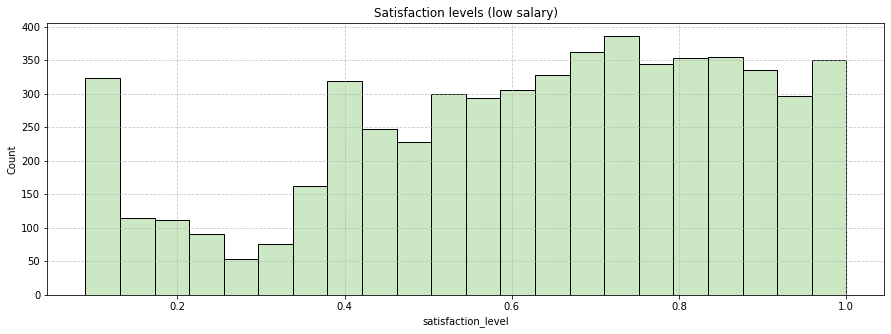

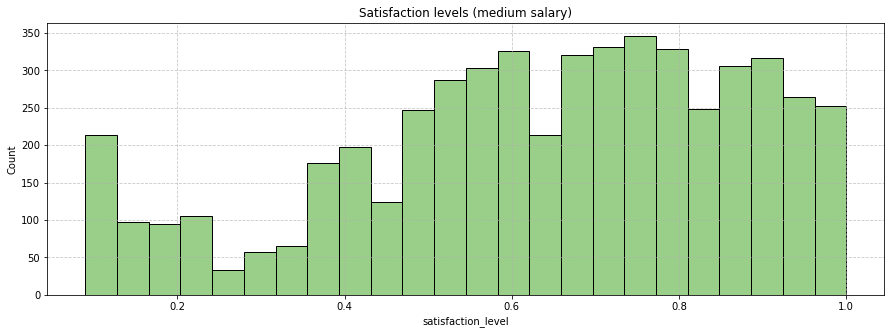

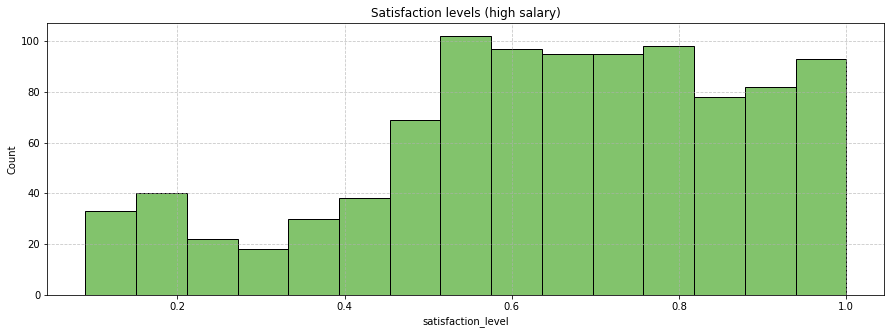

In [18]:
# # visualization about: satisfaction level per salary class
sal_list = [df0[df0["salary"]=="low"], df0[df0["salary"]=="medium"], df0[df0["salary"]=="high"]]
def sat_hist(sal_list):
    colors = ['#bcdfb1', '#79bf62', '#58af3b']
    for i, color in zip(sal_list, colors):
        plt.figure(figsize=(15, 5))
        sns.histplot(
            data=i,
            x='satisfaction_level',
            color=color,
        )
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'Satisfaction levels ({i["salary"].iloc[1]} salary)')
        plt.show()

sat_hist(sal_list)

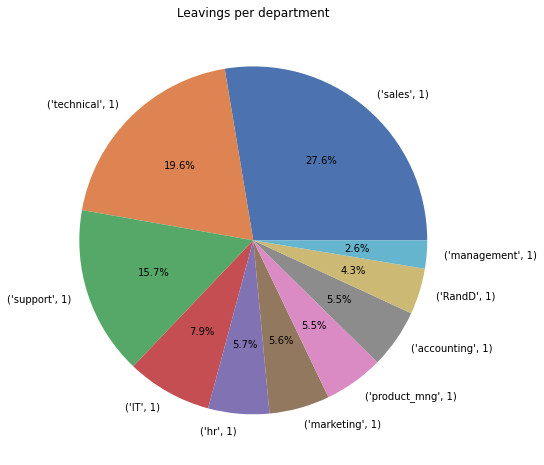

In [19]:
# visualization about: correlation between departments and leavings
leavings_department = df0[df0['left']==1].groupby('department')['left'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
plt.pie(
    leavings_department,
    labels=leavings_department.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('deep')
)
plt.title('Leavings per department')
plt.show()

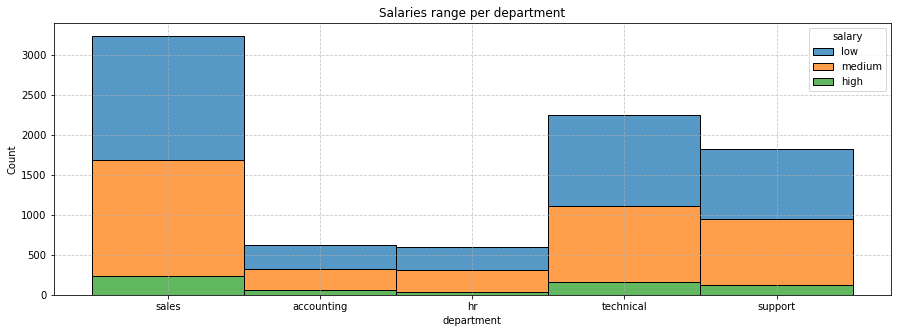

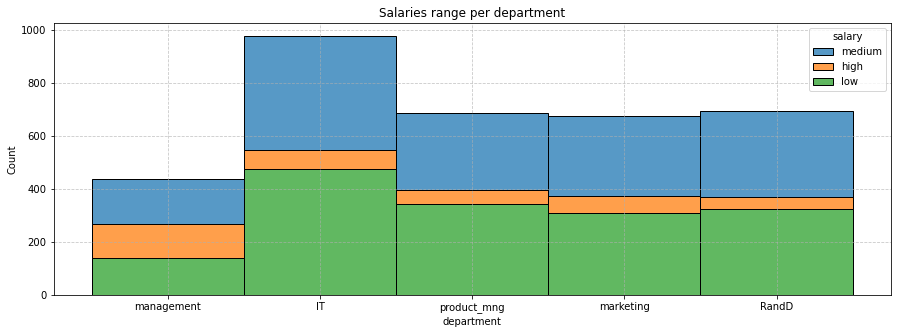

In [20]:
# visualization about: correlation between salary class and departments
dep_list1 = df0['department'].unique()[:5]
dep_list2 = df0['department'].unique()[5:]
dep_list_final = [dep_list1, dep_list2]

def dep_hist(dep_list_final, data):
    for list1 in dep_list_final:
        plt.figure(figsize=(15, 5))
        sns.histplot(
            data=data[data['department'].isin(list1)],
            hue='salary',
            x='department',
            multiple='stack',
            legend=True
        )
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title('Salaries range per department')
        plt.show()

dep_hist(dep_list_final, df0)

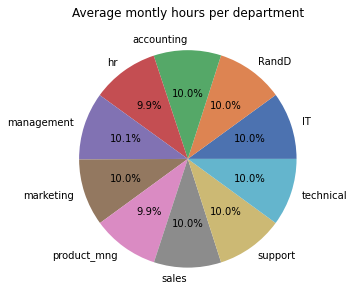

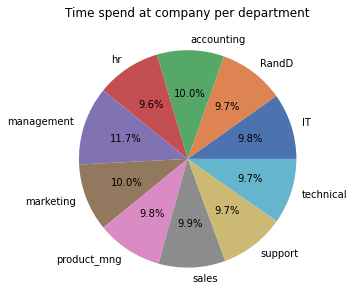

In [21]:
# visualization about: correlation between average monthly worked hours and departments
montly_department_hours = df0.groupby('department')['average_montly_hours'].mean()
time_spend_department = df0.groupby('department')['time_spend_company'].mean()
time_list = [montly_department_hours, time_spend_department]
def time_pie(time_list):
    titles = ['Average montly hours per department', 'Time spend at company per department']
    for i, title in zip(time_list, titles):
        plt.figure(figsize=(15, 5))
        plt.pie(
            i,
            labels=i.index, 
            autopct='%1.1f%%',
            colors=sns.color_palette('deep')
        )
        plt.title(title)
        
time_pie(time_list)

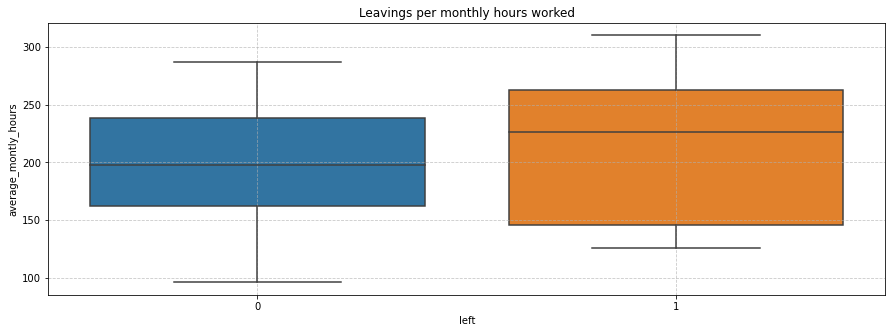

In [22]:
# visualization about: correlation between average monthly worked hours and leavings
plt.figure(figsize=(15, 5))
sns.boxplot(
    x='left', 
    y='average_montly_hours', 
    data=df0
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Leavings per monthly hours worked')
plt.show()

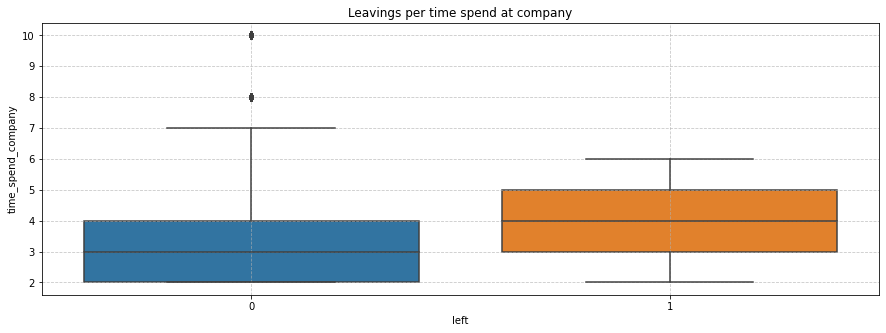

In [23]:
# visualization about: correlation between years in the company and leavings
plt.figure(figsize=(15, 5))
sns.boxplot(
    x='left', 
    y='time_spend_company', 
    data=df0
)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Leavings per time spend at company')
plt.show()

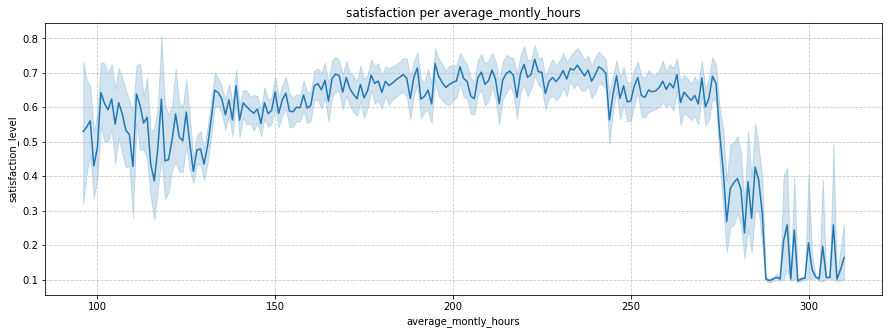

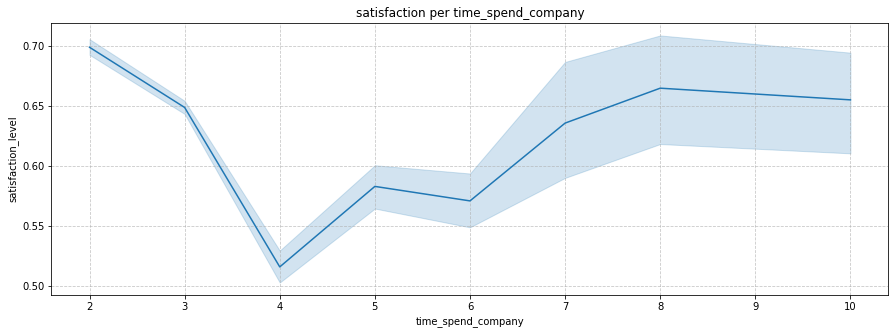

In [24]:
# visualization about: correlation between time and satisfaction level
options = ['average_montly_hours', 'time_spend_company']
def line_sat(options):
    for i in options:
        plt.figure(figsize=(15, 5))
        sns.lineplot(
            x=i, 
            y='satisfaction_level', 
            data=df0
        )
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.title(f'satisfaction per {i}')
        plt.show()

line_sat(options)

### Insights

1. As the level of satisfaction increased, the number of people who stayed in the company did as well. In the opposite way, as the level of satisfaction decreased, the number of people who left increased. 
2. 59% of the people who have left the company had a low salary, while just 2.4% had a high salary. However, it's important to consider the balance: 47.87% of the dataset is in the low salary range, while 8.26% is in the high salary range. 
3. Anyway, it seems that the salary is not related to the level of satisfaction because the level of satisfaction follows a similar distribution between the three ranges of salaries. It's probable that the salary is not related to the churn of the employees. 
4. The two departments with more churns are sales (27.6%) and technical (19.6%). The department with the lowest number of churns is management, with a 2.6%. 
5. All the departments follow a similar distribution in their salary ranges. The most of the employees are in the ranges of low and medium, and the less in high. The only department that does not follow this rule is management, where the three ranges are very similar. 
6. All the departments have a similar average of monthly worked hours and have spent, on average, the same number of years in the company. The time they work does not seem to be related to why some departments have more turnover than others. 
7. However, it could be a relationship between the churnings and the time. On average, employees who have worked more hours and spent more years in the company are more likely to leave. 
8. The last point is reinforced because it seems there is a relationship between time and satisfaction level. After the 250 average monthly hours worked, the satisfaction levels decreased drastically. On the other hand, the satisfaction level decreased gradually in the first 4 years of the company; after that point, it went up gradually. The promotion after five years could be related to that. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd? Nothing odd came across during the model construction. 
- Which independent variables did you choose for the model and why? I didn't drop any variables, so I used all the variables but 'left' which is the dependent variable.
- Are each of the assumptions met? All the way to this stage, the assumptions have been met.
- How well does your model fit the data? The model fitted the data well, and after testing it with the validated data, it scored a f1 of 0.951. 
- Can you improve it? Is there anything you would change about the model? I could improve it using a wider range of hyperparameters. However, it performed well, so it is not necessary to do it.
- What resources do you find yourself using as you complete this stage? Pandas documentation:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html, and the stack exchange forum: https://datascience.stackexchange.com/questions/20199/train-test-split-error-found-input-variables-with-inconsistent-numbers-of-sam.
- Do you have any ethical considerations in this stage? Only the same consideration I have had in the past stages.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The target variable (left) is binary, which means we cannot use algorithms that work with continuous variables.

### Identify the types of models most appropriate for this task.

In this case, I will use a random forest model. This model is correct for this case due to its capacity to work with binary variables, its low tendency to bias, and its prediction power. Besides, this model shouldn't require high computational resources. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [54]:
# let's check again the dataset state
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
# let's convert 'department' and 'salary' to one-hot encoded features.
df_dummies = pd.get_dummies(df0, columns=['department', 'salary'])
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
# dataset variables and shape after dummies
print(f'{df_dummies.shape}\n')
print(df_dummies.dtypes)

(11991, 21)

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
dtype: object


In [57]:
# separate the dataset into the target variables (y) and features (X)
y = df_dummies['left']
X = df_dummies.drop(columns=['left'], axis=1)

In [58]:
# let's take a look of the two variables
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [59]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [63]:
# separate into train, validate, and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=158)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=204)

In [65]:
# let's check the shape of the sets
print(X_tr.shape, X_val.shape, X_test.shape)
print(y_tr.shape, y_val.shape, y_test.shape)

(7673, 20) (1919, 20) (2399, 20)
(7673,) (1919,) (2399,)


In [66]:
# set hyperparameters
cv_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 50],
    'min_samples_leaf': [0.5, 1],
    'min_samples_split': [0.001, 0.01],
    'max_features': ['auto'],
    'max_samples': [0.5, 0.9]
}

In [67]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [69]:
# instantiate number
rf = RandomForestClassifier(random_state=165)

# search over specified parameters 
rf_val = GridSearchCV(rf, cv_params, cv=5, refit='f1')

In [71]:
%%time
# fit the model
rf_val.fit(X_tr, y_tr)

CPU times: user 31.2 s, sys: 119 ms, total: 31.4 s
Wall time: 31.4 s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=165,
                                 

In [72]:
# obtain optimal parameters
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [73]:
rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="auto", max_samples = 0.9, random_state = 41)

In [74]:
# fit the optimal model
rf_opt.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=41, verbose=0,
                       warm_start=False)

In [77]:
# validate optimal model
y_pred_val = rf_opt.predict(X_val)

# test the prediction made by the model
f1_test = f1_score(y_val, y_pred_val, pos_label=1)
print("The f1 score is {fs: .3f}".format(fs=f1_test))

The f1 score is  0.951


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)? The model is good at predicting true negatives and positives. It was validated and tested, so the risk of overfitting and underfitting is low. 
- What business recommendations do you propose based on the models built? The 'satisfaction level' is the variable that more weight has over the leavings; it should be a good idea to discover which variables have more correlation with this level of satisfaction. It seems that the number of projects could be the variable more correlated because it was the second variable with more weight over the leaves. The number of years that employees spend in the company is the third variable with more importance. 
- What potential recommendations would you make to your manager/company? Invest in increasing the satisfaction of the employees who have less than five years working in the company. 
- Do you think your model could be improved? Why or why not? How? Yes, it could be improved with a wider range of hyperparameters. However, I won't implement it because the model performed well without these hyperparameters, which could take more time and resources. 
- Given what you know about the data and the models you were using, what other questions could you address for the team? I could answer questions like: which other approaches we could try referring to the model approach used, how the data can be improved to get better results, which variables lack importance and which variables have a lot of importance, and what other variables could enrich the data. 
- What resources do you find yourself using as you complete this stage? At this stage, I didn't use any external resources. 
- Do you have any ethical considerations in this stage? Convey the results in a neutral way.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [78]:
# test optimal model
y_pred = rf_opt.predict(X_test)

# test the prediction made by the model
f1_test = f1_score(y_test, y_pred, pos_label=1)
print("The f1 score is {fs: .3f}".format(fs=f1_test))

The f1 score is  0.947


In [80]:
# get the rest of the scores

# precision score
pc_test = precision_score(y_test, y_pred, pos_label=1)
print("The precision score is {pc: .3f}".format(pc=pc_test))

# recall score
rc_test = recall_score(y_test, y_pred, pos_label=1)
print("The recall score is {rc: .3f}".format(rc=rc_test))

# recall score
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac: .3f}".format(ac=ac_test))

The precision score is  0.981
The recall score is  0.916
The accuracy score is  0.983


### Summary of model results

Scores:
- Precison: 98.1%
- Recall: 91.6%
- Accuracy: 98.3%
- F1: 94.7%

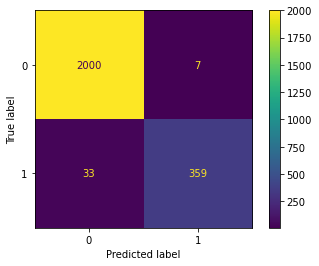

In [88]:
# Let's make a confusion matrix to check model performance
cm = metrics.confusion_matrix(y_test, y_pred, labels = rf_opt.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_opt.classes_)
disp.plot(values_format='d')

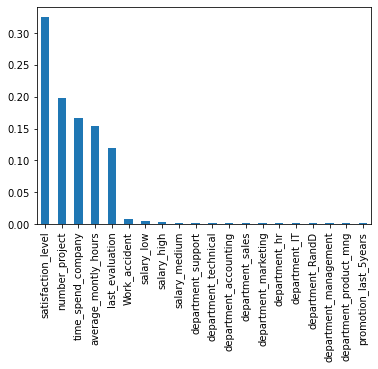

In [90]:
# Finally let's check wich variable were more important
importances = rf_opt.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

### Conclusion, Recommendations, Next Steps
- Satisfaction level and the number of projects are the two variables of importance. They directly affect whether or not an employee churns. 
- Company should invest in increasing the satisfaction of the employees who have less than five years working in the company.
- The company needs to focus on the employees with less time in the company, and a larger number of projects. 
- The company needs to increase their variables and continue gathering the data they have in order to make the model more powerful. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.